In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pylab import rcParams

In [2]:
data = pd.read_csv('./Data/한국가스공사_시간별 공급량_20181231.csv', encoding = 'euc-kr').dropna()

In [3]:
data.head()

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105


In [4]:
data['연월일'] = pd.to_datetime(data['연월일'])

In [5]:
data.shape

(368088, 4)

In [6]:
data['year']  = data['연월일'].dt.year
data['month'] = data['연월일'].dt.month
data['day']   = data['연월일'].dt.day

In [7]:
data.iloc[-10:]

,연월일,시간,구분,공급량,year,month,day
368078,2018-12-31,15,H,525.488,2018,12,31
368079,2018-12-31,16,H,518.009,2018,12,31
368080,2018-12-31,17,H,542.360,2018,12,31
368081,2018-12-31,18,H,603.138,2018,12,31
368082,2018-12-31,19,H,678.975,2018,12,31
368083,2018-12-31,20,H,681.033,2018,12,31
368084,2018-12-31,21,H,669.961,2018,12,31
368085,2018-12-31,22,H,657.941,2018,12,31
368086,2018-12-31,23,H,610.953,2018,12,31
368087,2018-12-31,24,H,560.896,2018,12,31


In [8]:
data['구분'].value_counts()

A    52584
B    52584
C    52584
D    52584
E    52584
G    52584
H    52584
Name: 구분, dtype: int64

In [9]:
suppliers = ['A', 'B', 'C', 'D', 'E', 'G', 'H']
datas = dict()

for supplier in suppliers:
    datas['data_{}'.format(supplier)] = (data[data['구분'] == supplier].reset_index(drop=True))

In [10]:
for data in datas.values():
    print(data.shape)

(52584, 7)
(52584, 7)
(52584, 7)
(52584, 7)
(52584, 7)
(52584, 7)
(52584, 7)


In [11]:
months = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

# checking if the number of days add up to 365
total = 0
for i in months:
    total += i
    
total

365

In [12]:
# vertical lines for indicating the end of each month
index = 0
vertical_coords = []

for i in months:
    index += i
    vertical_coords.append(index)
    
vertical_coords

[31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365]

In [ ]:
#plt.figure(figsize = (10,6))

for data in datas.values():
    rcParams['figure.figsize'] = 20, 10
    fig = plt.figure()

    ax1 = fig.add_subplot(231)
    ax2 = fig.add_subplot(232)
    ax3 = fig.add_subplot(233)
    ax4 = fig.add_subplot(234)
    ax5 = fig.add_subplot(235)
    ax6 = fig.add_subplot(236)

    axes = [ax1, ax2, ax3, ax4, ax5, ax6]

    for ax in axes:
        for vc in vertical_coords:
            ax.axvline(vc*24, linewidth=2, color="r")
    
    plotted_datas = []
    years = [2013, 2014, 2015, 2016, 2017, 2018]
    
    for year in years:
        plotted_datas.append(data[data['year'] == year].reset_index(drop=True))
    
    
    i = 0
    while i < len(axes):
        axes[i].plot(plotted_datas[i]['공급량'])
        axes[i].set_ylim(( 0, data['공급량'].max() + 500 ))
        axes[i].set_title("Supplier "+ str(plotted_datas[i]['구분'][0])+ " " + str(plotted_datas[i]['year'][0]))
        i += 1

    #plt.savefig('./Graphs/supplier{}.png'.format(str(plotted_datas[0]['구분'][0])), dpi=100)


In [ ]:
'''
# saving data for each supplier
for k,v in datas.items():
    filepath = './Data/supplier_{}.csv'.format(k[-1])
    v.to_csv(filepath)
'''

In [ ]:
test_data = pd.read_csv('./Submission/test.csv')

In [ ]:
test_data['구분'] = test_data['일자|시간|구분'].str[-1]
test_data['연월일'] = pd.to_datetime(test_data['일자|시간|구분'].str[:-5])
test_data['시간'] = test_data['일자|시간|구분'].str[-4:-2].astype(np.float32)

test_data['year']  = test_data['연월일'].dt.year
test_data['month'] = test_data['연월일'].dt.month
test_data['day']   = test_data['연월일'].dt.day

In [ ]:
test_data.head()

In [ ]:
test_data.shape

test_data['구분'].value_counts()

print(test_data.iloc[2160-5:2160])
print(test_data.iloc[2160:2160+5]['구분'])
print(test_data.iloc[2160*2:2160*2+5]['구분'])
print(test_data.iloc[2160*3:2160*3+5]['구분'])
print(test_data.iloc[2160*4:2160*4+5]['구분'])
print(test_data.iloc[2160*5:2160*5+5]['구분'])
print(test_data.iloc[2160*6:2160*6+5]['구분'])

In [89]:
training_A_12  = datas['data_A'][ (datas['data_A']['month'] == 12) & \
                                  (datas['data_A']['year'].isin([2013, 2014, 2015,2016, 2017])) ].reset_index(drop = True)


### for cutting out all december days except the 31st
training_A_12 = training_A_12.sort_values(['year', 'month','day']).reset_index(drop=True)

training_A_12['year'].value_counts()
training_A_12_cut = []
for i in range(1,6):
    training_A_12_cut.append(training_A_12.iloc[(744*i)-24:744*i])

training_A_12_final = pd.concat(training_A_12_cut, axis = 0)
training_A_12_final['year'].value_counts()

for i in range(0,5):
    print(training_A_12_final.iloc[24*i])
    

연월일      2013-12-31 00:00:00
시간                         1
구분                         A
공급량                 1901.489
year                    2013
month                     12
day                       31
Name: 720, dtype: object
연월일      2014-12-31 00:00:00
시간                         1
구분                         A
공급량                 1909.305
year                    2014
month                     12
day                       31
Name: 1464, dtype: object
연월일      2015-12-31 00:00:00
시간                         1
구분                         A
공급량                 1783.377
year                    2015
month                     12
day                       31
Name: 2208, dtype: object
연월일      2016-12-31 00:00:00
시간                         1
구분                         A
공급량                 1921.297
year                    2016
month                     12
day                       31
Name: 2952, dtype: object
연월일      2017-12-31 00:00:00
시간                         1
구분                         

In [90]:
training_A_1_3 = datas['data_A'][ (datas['data_A']['month'].isin([1,2,3])) & \
                                  (datas['data_A']['year'].isin([2014, 2015, 2016, 2017, 2018])) ].reset_index(drop = True)


training_A = pd.concat([training_A_12_final, training_A_1_3], axis = 0).reset_index(drop=True)
training_A = training_A.sort_values(['year', 'month']).reset_index(drop=True)

In [91]:
training_A['year'].value_counts()

2016    2208
2014    2184
2015    2184
2017    2184
2018    2160
2013      24
Name: year, dtype: int64

In [128]:
print(training_A.shape)

years = [2014, 2015, 2016, 2017, 2018]
indices = []
for year in years:
    indices.append(training_A[(training_A['year'] == year) & (training_A['month'] == 3) &\
            (training_A['day'] == 31) & (training_A['시간'] == 24)].index[0])
    
print(indices)

training_A_sep = []

#print(training_A[0:2184])

last_idx = 0
for idx in indices:
    idx = idx + 1 
    #if idx != training_A.shape[0] -1 else idx
    training_A_sep.append(training_A[last_idx:idx][['공급량', 'year', 'month', 'day', '시간']])
    last_idx = idx


(10944, 7)
[2183, 4367, 6575, 8759, 10943]


In [129]:
# use 12, 1, 2, 3
# and use past 30 days as input
    
print(training_A_sep[0].iloc[:5])
print(training_A_sep[0].iloc[-5:])


        공급량  year  month  day  시간
0  1901.489  2013     12   31   1
1  1706.081  2013     12   31   2
2  1533.921  2013     12   31   3
3  1611.033  2013     12   31   4
4  1792.161  2013     12   31   5
           공급량  year  month  day  시간
2179  1024.849  2014      3   31  20
2180  1051.497  2014      3   31  21
2181  1037.153  2014      3   31  22
2182   940.265  2014      3   31  23
2183   894.665  2014      3   31  24


In [130]:
# change pandas dataframe to numpy ndarray
for i in range(len(training_A_sep)):
    training_A_sep[i] = training_A_sep[i].values

In [131]:
training_A_sep[0].shape # 2013 to 2014
training_A_sep[0][-2:]

print(training_A_sep[0][:,[0]].shape)

(2184, 1)


In [133]:
training_A_np = np.concatenate(training_A_sep, axis = 0)
training_A_np.shape

training_A_np[:5]

array([[1.901489e+03, 2.013000e+03, 1.200000e+01, 3.100000e+01,
        1.000000e+00],
       [1.706081e+03, 2.013000e+03, 1.200000e+01, 3.100000e+01,
        2.000000e+00],
       [1.533921e+03, 2.013000e+03, 1.200000e+01, 3.100000e+01,
        3.000000e+00],
       [1.611033e+03, 2.013000e+03, 1.200000e+01, 3.100000e+01,
        4.000000e+00],
       [1.792161e+03, 2.013000e+03, 1.200000e+01, 3.100000e+01,
        5.000000e+00]])

In [134]:
from sklearn.preprocessing import MinMaxScaler

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

x_scaler.fit(training_A_np)
y_scaler.fit(training_A_np[:, [0]])

In [106]:
def create_LSTM_Input(data, seq_length, step_size):
    final_data = np.zeros((data.shape[0]-seq_length, int(seq_length/step_size), data.shape[1]))

    length = data.shape[0]

    for i in range(final_data.shape[0]):
        final_data[i] = data[i:i+seq_length:step_size]

    return final_data

def create_LSTM_Output(data, seq_length):
    final_output = []
    length = data.shape[0]
    
    for i in range(seq_length, length):
        final_output.append(data[i])
    
    final_output = np.array(final_output)
    #final_output = np.expand_dims(final_output, axis = 1)
    
    return final_output
        

In [208]:
lstm_input_lst = []
lstm_output_lst = []
for i in range(len(training_A_sep)):
    x_norm = x_scaler.transform(training_A_sep[i])
    #[:,[0, 4]]
    y_norm = y_scaler.transform(training_A_sep[i][:, [0]])
    lstm_input_lst.append(create_LSTM_Input(x_norm, 3, 1))
    lstm_output_lst.append(create_LSTM_Output(y_norm, 3))

    
lstm_input = np.concatenate(lstm_input_lst, axis = 0)
lstm_output = np.concatenate(lstm_output_lst, axis = 0)

In [209]:
training_A_sep[2].shape

(2208, 5)

In [210]:
print(lstm_input.shape)
print(lstm_output.shape)
print(lstm_input[:2])
print(lstm_output[:2])

(10929, 3, 5)
(10929, 1)
[[[0.39824091 0.         1.         1.         0.        ]
  [0.34570364 0.         1.         1.         0.04347826]
  [0.29941682 0.         1.         1.         0.08695652]]

 [[0.34570364 0.         1.         1.         0.04347826]
  [0.29941682 0.         1.         1.         0.08695652]
  [0.3201491  0.         1.         1.         0.13043478]]]
[[0.3201491 ]
 [0.36884705]]


In [211]:
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(lstm_input, lstm_output, test_size = 0.2, random_state = 1311, shuffle=True)


In [212]:
import tensorflow as tf

from tensorflow.keras.layers import Reshape, Dense, Input, LSTM, Flatten, Concatenate, Bidirectional, BatchNormalization, Dropout, ReLU, Activation, ConvLSTM2D, RepeatVector
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [215]:
input_x = Input(shape=(3,5)) #(sequence length, num of features) for LSTM; i.e. 50 minutes (sequence of 50 minutes)

x = LSTM(20, return_sequences=True)(input_x)
x = BatchNormalization()(x)
x = Activation('tanh')(x)

x = LSTM(10, return_sequences=True)(x)
x = BatchNormalization()(x)
x = Activation('tanh')(x)

x = Flatten()(x)

x = Dense(32)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

output = Dense(1)(x)


model = Model(inputs = input_x, outputs = output)
model.compile(loss="mean_absolute_error", optimizer = Adam(lr=0.001)) 
model.summary()


Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 3, 5)]            0         
_________________________________________________________________
lstm_30 (LSTM)               (None, 3, 20)             2080      
_________________________________________________________________
batch_normalization_45 (Batc (None, 3, 20)             80        
_________________________________________________________________
activation_45 (Activation)   (None, 3, 20)             0         
_________________________________________________________________
lstm_31 (LSTM)               (None, 3, 10)             1240      
_________________________________________________________________
batch_normalization_46 (Batc (None, 3, 10)             40        
_________________________________________________________________
activation_46 (Activation)   (None, 3, 10)             0  

In [ ]:
hist = model.fit(train_x, train_y, batch_size = 128, epochs =30, validation_data = (valid_x, valid_y))

Epoch 1/30


2021-10-19 22:36:37.709190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-19 22:36:37.952442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-19 22:36:38.029111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-19 22:36:38.095458: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-19 22:36:38.151949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


69/69 [==============================] - ETA: 0s - loss: 0.1744

2021-10-19 22:36:40.127346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-19 22:36:40.187877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-19 22:36:40.208987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


69/69 [==============================] - 4s 32ms/step - loss: 0.1744 - val_loss: 0.3596
Epoch 2/30
69/69 [==============================] - 2s 26ms/step - loss: 0.0993 - val_loss: 0.4430
Epoch 3/30
69/69 [==============================] - 2s 25ms/step - loss: 0.0872 - val_loss: 0.4983
Epoch 4/30
69/69 [==============================] - 2s 26ms/step - loss: 0.0812 - val_loss: 0.4256
Epoch 5/30
67/69 [============================>.] - ETA: 0s - loss: 0.0754

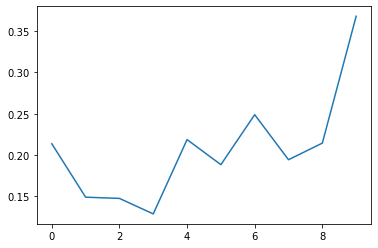

In [195]:
plt.plot(hist.history['val_loss'])